In [12]:
#import all necessary libraries
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#create a DatFrame of the data set by reading it from its csv file
df = pd.read_csv('Mall_Customers.csv')

In [4]:
#initial analysis to get to know the data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#to check for any null values that may be present in the data set
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

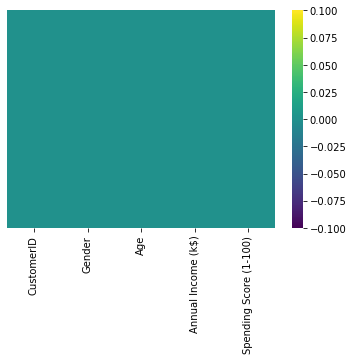

In [6]:
#to visually represent if there are any null values
#a uniform color corresponding to 0.0 depicts no null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [7]:
#to perform one-hot encoding to make the 'Gender' column have numerical values
#the new column is called Gender_Male and 0 value means the individual is a Female while 1 means Male
df_new = pd.get_dummies(df, columns = ['Gender'],drop_first = True)
df_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
# Exploratory Data Analysis

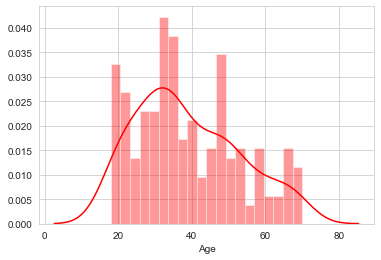

In [10]:
sns.set_style('whitegrid')
sns.distplot(df_new['Age'],color='red',bins=20)

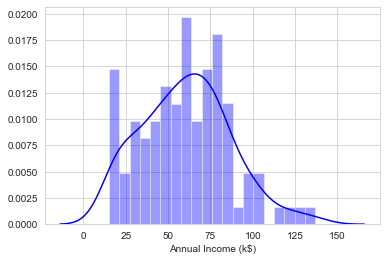

In [14]:
sns.distplot(df_new['Annual Income (k$)'],color='blue',bins=20)

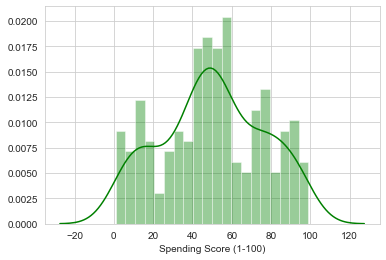

In [15]:
sns.distplot(df_new['Spending Score (1-100)'],color='green',bins=20)

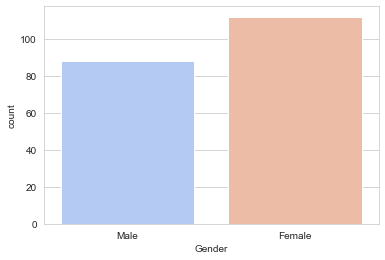

In [17]:
sns.countplot(x = 'Gender',data = df, palette = 'coolwarm')

In [18]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

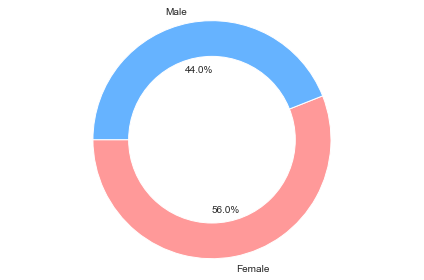

In [19]:
labels = ['Female','Male']
sizes = [df['Gender'].value_counts()['Female'],df['Gender'].value_counts()['Male']]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=180)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

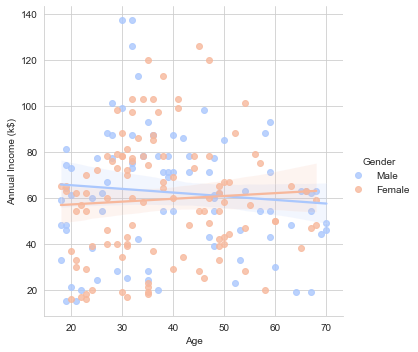

In [21]:
sns.lmplot(x = 'Age',y = 'Annual Income (k$)',data = df, hue = 'Gender',palette = 'coolwarm')

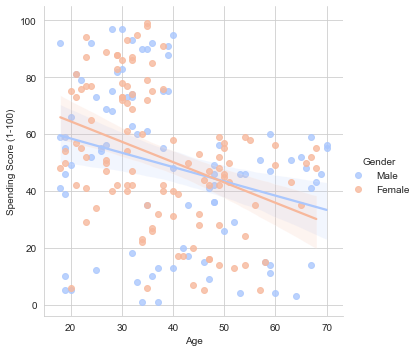

In [17]:
sns.lmplot(x = 'Age',y = 'Spending Score (1-100)',data = df, hue = 'Gender',palette = 'coolwarm')

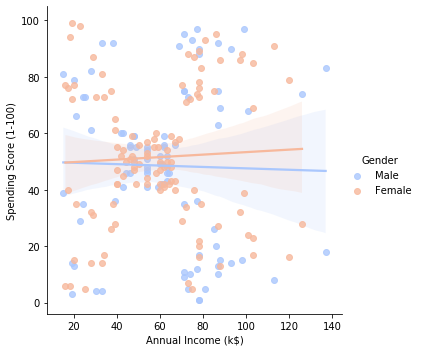

In [8]:
sns.lmplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = df, hue = 'Gender',palette = 'coolwarm')

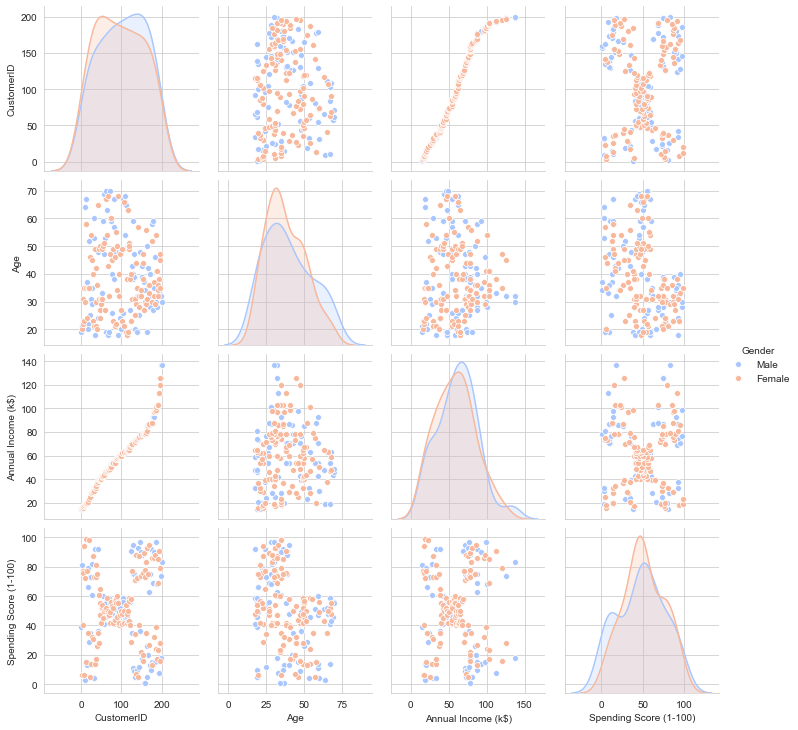

In [11]:
sns.pairplot(df,hue = 'Gender',palette = 'coolwarm')

In [25]:
#we drop the gender column as analysis on the gender feature has already taken place
#for the clustering algorithm we won't make use of this column
X = df_new.drop('Gender_Male',axis = 1)
#here we perform the elbow method to find optimum number of clusters
from sklearn.cluster import KMeans
inertia_array = []
for i in range(1,20):
    km = KMeans(n_clusters = i)
    km.fit(X)
    inertia_array.append(km.inertia_)

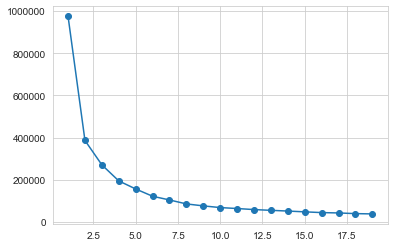

In [26]:
#visually representing the elbow method
plt.plot(range(1,20),inertia_array, marker = 'o')

In [27]:
#Optimum number of clusters is 5
km = KMeans(n_clusters = 5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
#storing the labels and centroids of the clusters
labels = km.labels_
centers = km.cluster_centers_

In [33]:
#to create the final 3D plot to visualise the clusters
x1 = df_new['Spending Score (1-100)']
y1 = df_new['Annual Income (k$)']
z1 = df_new['Age']

data = go.Scatter3d(x = x1, y = y1, z = z1,mode = 'markers',marker = dict(color = labels, size = 5, line = dict(color = labels,), opacity = 0.9))
layout = go.Layout(title = 'Clusters', scene = dict(xaxis = dict(title = 'Spending Score'),
                                                   yaxis = dict(title = 'Annual_income'),
                                                   zaxis = dict(title = 'Age')))
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)